In [45]:
# General imports

import numpy as np
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, execute, IBMQ, transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere, array_to_latex, plot_state_city
from qiskit.quantum_info import Statevector

# Load IBMQ account
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-02-12 23:03:08,324: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [46]:
# Get a provider
provider = IBMQ.get_provider(hub = 'ibm-q')

# Find a backend with at least 5 qubits, not a simulator, and cx as a basis gate
possible_backends = provider.backends(filters = lambda b: b.configuration().n_qubits >=5
                                    and not b.configuration().simulator
                                    and 'cx' in b.configuration().basis_gates)

# Display the options
print(
    f''.join(f'\n {b.name()} \n'
             f'Num Qubits: {len(b.properties().qubits)} \n'
             f'Gates:  {["{0}".format(g.gate) + "-".join(map(str, g.qubits)) for g in b.properties().gates]} \n'
             for b in possible_backends)
)


 ibmq_santiago 
Num Qubits: 5 
Gates:  ['id0', 'id1', 'id2', 'id3', 'id4', 'rz0', 'rz1', 'rz2', 'rz3', 'rz4', 'sx0', 'sx1', 'sx2', 'sx3', 'sx4', 'x0', 'x1', 'x2', 'x3', 'x4', 'cx4-3', 'cx3-4', 'cx0-1', 'cx1-0', 'cx2-3', 'cx3-2', 'cx2-1', 'cx1-2', 'reset0', 'reset1', 'reset2', 'reset3', 'reset4'] 

 ibmq_bogota 
Num Qubits: 5 
Gates:  ['id0', 'id1', 'id2', 'id3', 'id4', 'rz0', 'rz1', 'rz2', 'rz3', 'rz4', 'sx0', 'sx1', 'sx2', 'sx3', 'sx4', 'x0', 'x1', 'x2', 'x3', 'x4', 'cx4-3', 'cx3-4', 'cx3-2', 'cx2-3', 'cx1-2', 'cx2-1', 'cx1-0', 'cx0-1', 'reset0', 'reset1', 'reset2', 'reset3', 'reset4'] 

 ibmq_lima 
Num Qubits: 5 
Gates:  ['id0', 'id1', 'id2', 'id3', 'id4', 'rz0', 'rz1', 'rz2', 'rz3', 'rz4', 'sx0', 'sx1', 'sx2', 'sx3', 'sx4', 'x0', 'x1', 'x2', 'x3', 'x4', 'cx4-3', 'cx3-4', 'cx0-1', 'cx1-0', 'cx3-1', 'cx1-3', 'cx2-1', 'cx1-2', 'reset0', 'reset1', 'reset2', 'reset3', 'reset4'] 

 ibmq_belem 
Num Qubits: 5 
Gates:  ['id0', 'id1', 'id2', 'id3', 'id4', 'rz0', 'rz1', 'rz2', 'rz3', 'rz4', '

# Constructing and measuring the N-qubit GHZ State

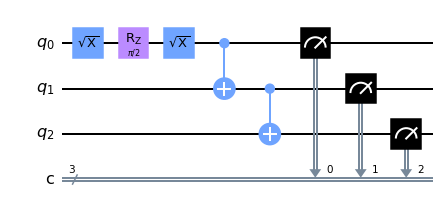

In [50]:
# Construct the standard 3 qubit GHZ state

qr = QuantumRegister(3, name = 'q')
cr = ClassicalRegister(3, name = 'c')
qc = QuantumCircuit(qr, cr, name = '3GHZ')

# Form a Hadamard gate out of SX, RZ(pi/2), SX
qc.sx(0)
qc.rz(math.pi/2, 0)
qc.sx(0)

qc.cx(0, 1)
qc.cx(1, 2)

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw('mpl')


In [51]:
# Use IBMQ_Bogota for the backend
backend = possible_backends[1]

# Assemble run circuit on backend
job = backend.run(qc, job_name = '3GHZ', shots = 1024)

In [52]:
# Check job information
print(f'Creation Date: {job.creation_date()} \n'
     f'Backend: {job.backend()} \n'
     f'Name: {job.name()} \n'
     f'Job ID: {job.job_id()} \n'
     f'Running: {job.running()}')

Creation Date: 2022-02-12 23:06:30.351000-08:00 
Backend: ibmq_bogota 
Name: 3GHZ 
Job ID: 6208adf6e95068dfa10cc476 
Running: False


In [54]:
# Check job status
print(job.status())

JobStatus.DONE


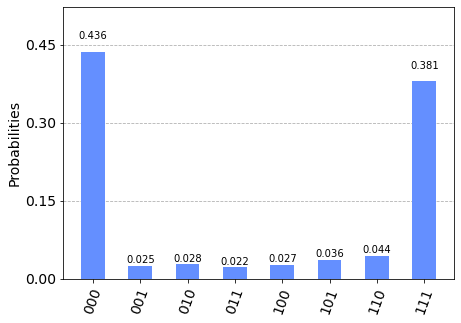

In [55]:
# Get results from job
result = job.result()

# Plot out measurement histogram for each qubit
plot_histogram(result.get_counts())

# 4 and 5 Qubit GHZ States

In [26]:
from qiskit.providers.ibmq.managed import IBMQJobManager

# Form 4 and 5 qubit GHZ states
qc4 = QuantumCircuit(QuantumRegister(4), ClassicalRegister(4), name = '4GHZ')
qc5 = QuantumCircuit(QuantumRegister(5), ClassicalRegister(5), name = '5GHZ')

# Set up 4 qubit GHZ circuit
qc4.sx(0)
qc4.rz(math.pi/2, 0)
qc4.sx(0)

for a in range(3):
    qc4.cx(a, a + 1)
    
for a in range(4):
    qc4.measure(a, a)
    
# Set up 5 qubit GHZ circuit
qc5.sx(0)
qc5.rz(math.pi/2, 0)
qc5.sx(0)

for a in range(4):
    qc5.cx(a, a + 1)
    
for a in range(5):
    qc5.measure(a, a)
    

# Set up a manager to organize the experiments
manager = IBMQJobManager()

# Run the experiments
jobset = manager.run([qc4, qc5], backend = backend, name = 'GHZ', shots = 2048)

In [27]:
# Check job status
print(jobset.report())

Job set name: GHZ
          ID: 1a1b82dbf27542ab8c967badb26bd4ee-16447303469677272
        tags: []
Summary report:
       Total jobs: 1
  Successful jobs: 0
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 1

Detail report:
  experiments: 0-1
    job index: 0
    job ID: 620897ec6c2170ebba0e0b46
    name: GHZ_0_
    status: job is queued
    queue position: 2


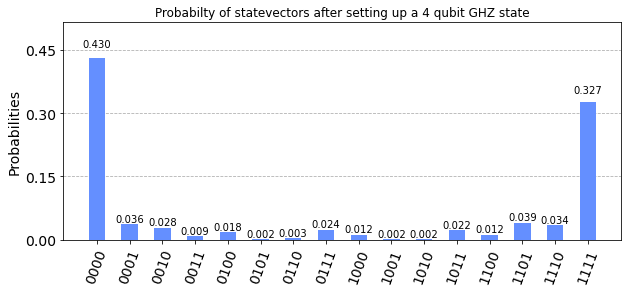

In [35]:
# Get the results
results = jobset.results()

# 4 qubit GHZ circuit
plot_histogram(results.get_counts(0), figsize = (10, 4), 
               title = 'Probabilty of statevectors after setting up a 4 qubit GHZ state') 

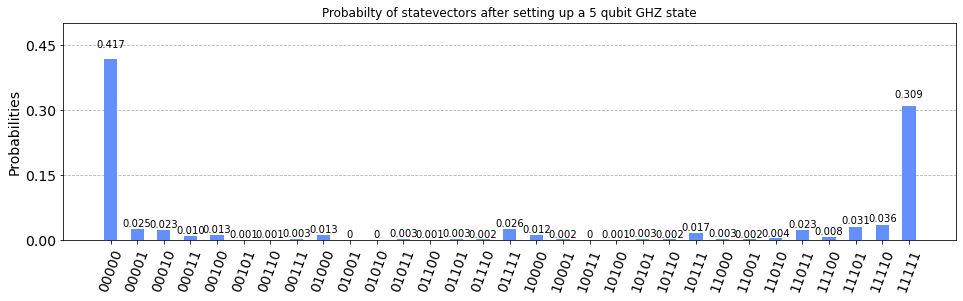

In [36]:
# 5 qubit GHZ circuit
plot_histogram(results.get_counts(1), figsize = (16, 4), 
               title = 'Probabilty of statevectors after setting up a 5 qubit GHZ state') 

3 Qubit GHZ Circuit Layout


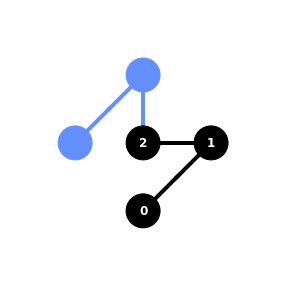

4 Qubit GHZ Circuit Layout


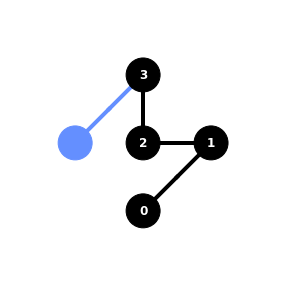

5 Qubit GHZ Circuit Layout


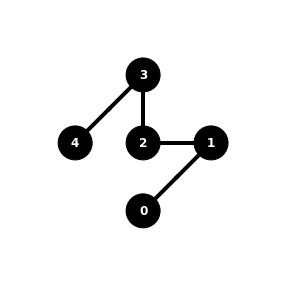

In [39]:
from qiskit.visualization import plot_circuit_layout

# This time use the transpiler to optimize the circuit for the backend
circuits = transpile([qc, qc4, qc5], backend = backend, layout_method = 'noise_adaptive', optimization_level = 2)

for a in range(3):
    print(f'{a+3} Qubit GHZ Circuit Layout')
    display(plot_circuit_layout(circuits[a], backend))

In [40]:
# Run the transpiled circuits for comparison
jobset = manager.run(circuits, backend = backend, name = 'GHZ', shots = 2048)

In [42]:
# Check job status
print(jobset.report())

Job set name: GHZ
          ID: aab28b33725a4514998fc52e13c9e88e-16447335794240215
        tags: []
Summary report:
       Total jobs: 1
  Successful jobs: 1
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-2
    job index: 0
    job ID: 6208a48df15ce9df3ddeb308
    name: GHZ_0_
    status: job has successfully run


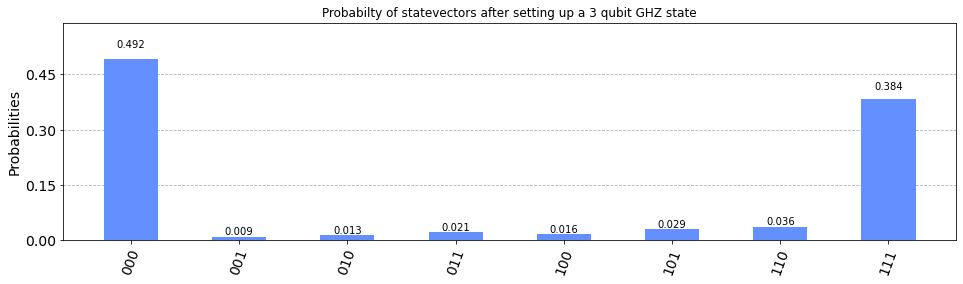

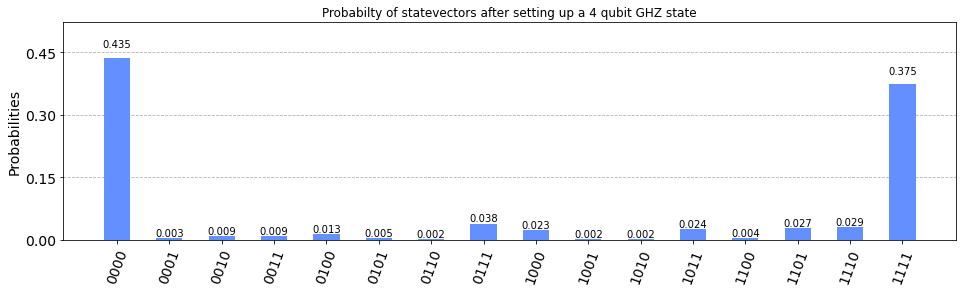

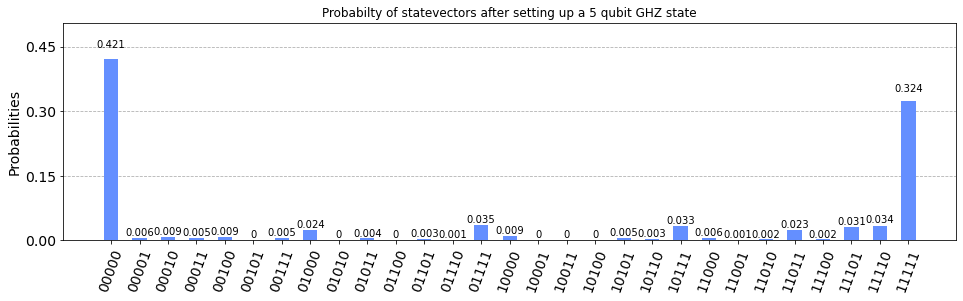

In [44]:
# Display the results
results = jobset.results()

for a in range(3):
    display(plot_histogram(results.get_counts(a), figsize = (16, 4), 
               title = f'Probabilty of statevectors after setting up a {a + 3} qubit GHZ state')) 

# Teleport Protocol Test

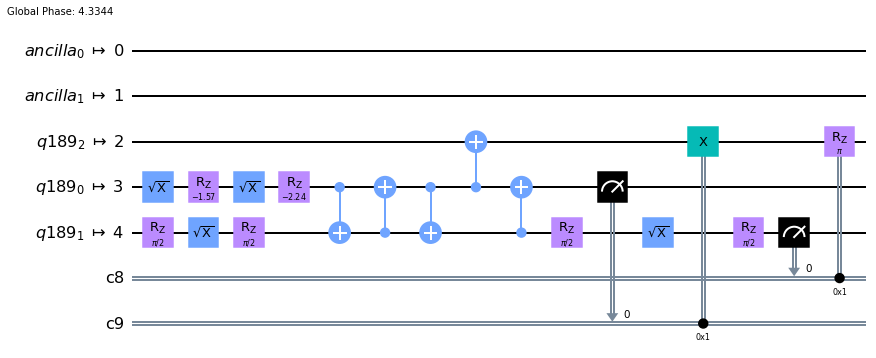

In [59]:
from qiskit.quantum_info import random_statevector

crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
tc = QuantumCircuit(QuantumRegister(3), crz, crx, name = 'teleport')

# pick a random statevector to teleport and save it
initial_state = random_statevector(2)
tc.initialize(initial_state, 0)

tc.h(1)
tc.cx(1, 2)

tc.cx(0, 1)
tc.h(0)

tc.measure(0, 0)
tc.measure(1, 1)

tc.x(2).c_if(crx, 1) # documentation says that it should work with Clbit obj but only seems to work with ClassicalRegister
tc.z(2).c_if(crz, 1)

# Transpile
tc_optimized = transpile(tc, backend = backend, layout_method = 'noise_adaptive', optimization_level = 2)

# Show the transpiled circuit
display(tc_optimized.draw('mpl'))

# Can't actually run cicruit. Boolean functions such as c_if are not supported on the backend. 
#job = backend.run(tc_optimized, job_name = 'Teleport', shots = 1024)